In [79]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 
 
import torchvision  # 图片、视频处理
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os, shutil

device = 'cuda' if torch.cuda.is_available else 'cpu'
# device='cpu'
torch.__version__, torchvision.__version__, device


('2.0.1', '0.15.2', 'cuda')

In [80]:
torch.cuda.caching_allocator_delete
torch.cuda.empty_cache()  # 释放显存
print('Memory Allocated', torch.cuda.memory_allocated() )

Memory Allocated 72824832


In [81]:
torchvision.datasets.ImageFolder
# train_ds = torchvision.datasets.MNIST('data', 
#                                       train=True, 
#                                       download=True, 
#                                       transform=ToTensor())

torchvision.datasets.folder.ImageFolder

In [82]:
# 建立项目主目录
base_dir = r'./datasets/4weather'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

if not os.path.isdir(base_dir): os.mkdir( base_dir)
if not os.path.isdir(train_dir): os.mkdir( train_dir )
if not os.path.isdir(test_dir): os.mkdir( test_dir )

# 建立子目录
specises = ['cloudy', 'rain', 'shine', 'sunrise']
for train_or_test in ['train', 'test']:
    for spec in specises:
        sub_dir = base_dir + '/' + train_or_test + '/' + spec
        if not os.path.isdir(sub_dir): 
            os.mkdir( sub_dir)
            print(sub_dir, ' is created.')
        else:
            print(sub_dir, ' is existed.')
    

./datasets/4weather/train/cloudy  is existed.
./datasets/4weather/train/rain  is existed.
./datasets/4weather/train/shine  is existed.
./datasets/4weather/train/sunrise  is existed.
./datasets/4weather/test/cloudy  is existed.
./datasets/4weather/test/rain  is existed.
./datasets/4weather/test/shine  is existed.
./datasets/4weather/test/sunrise  is existed.


In [83]:
""" 整理文件的工作目录"""
image_dir=r'./datasets/weather_imgs/'
# os.listdir( image_dir)

for i, img in enumerate( os.listdir(image_dir) ):
    for spec in specises:
        if spec in img:
            s = os.path.join(image_dir, img)
            if i%5 == 0:
                d = os.path.join(base_dir, 'test', spec, img)
            else:
                d = os.path.join(base_dir, 'train', spec, img)
            shutil.copy(s, d)

# 文件存放状况
for train_or_test in ['train', 'test']:
    for spec in specises:
        # print(  os.listdir( os.path.join(base_dir, train_or_test, spec)), '\n')
        print( train_or_test, spec, len(os.listdir( os.path.join(base_dir, train_or_test, spec))) )

train cloudy 240
train rain 172
train shine 202
train sunrise 286
test cloudy 60
test rain 43
test shine 51
test sunrise 71


In [84]:
transform = transforms.Compose([
    transforms.Resize((96, 96)),
    transforms.ToTensor(),                           # 1、Channel放前面，2、转换成Tensor，3、数据归一化到0-1之间。
    transforms.Normalize( mean=[0.5, 0.5, 0.5], 
                         std=[0.5, 0.5, 0.5],
                         )
])

In [85]:
train_ds = torchvision.datasets.ImageFolder(
    train_dir,
    transform=transform
)
test_ds = torchvision.datasets.ImageFolder(
    test_dir,
    transform=transform
)

# test_ds = test_ds.to(device)

In [86]:
train_ds

Dataset ImageFolder
    Number of datapoints: 900
    Root location: ./datasets/4weather\train
    StandardTransform
Transform: Compose(
               Resize(size=(96, 96), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )

In [87]:
train_ds.classes

['cloudy', 'rain', 'shine', 'sunrise']

In [88]:
train_ds.class_to_idx

{'cloudy': 0, 'rain': 1, 'shine': 2, 'sunrise': 3}

In [89]:
len(train_ds), len(test_ds)

(900, 225)

In [90]:
""" 创建 dataloader """
BATCHSIZE = 256
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=BATCHSIZE, shuffle=True)  # batch_size开始为64,可能是最佳，或128
test_dl = torch.utils.data.DataLoader(test_ds, batch_size=BATCHSIZE, shuffle=False)

In [52]:
imgs, labels = next(iter(train_dl))   # train dataloder 可以分解出X和Ydata


In [53]:
imgs.shape, labels.shape   # 1: 黑白图片， 28x28的图片分辨率， 64张


(torch.Size([256, 3, 96, 96]), torch.Size([256]))

In [54]:
# 切片：取第一条，channel 0的数据(共有3个channel，红绿蓝三色); 输出2维：96x96的图片
imgs[0].shape 


torch.Size([3, 96, 96])

In [55]:
im = imgs[0].permute(1,2,0)   # 更换tensor中，向量的顺序，原来是0,1,2
im.shape                       # 注意 shape 和上面的变化

torch.Size([96, 96, 3])

In [56]:
im_np = im.numpy() 
# im_np

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


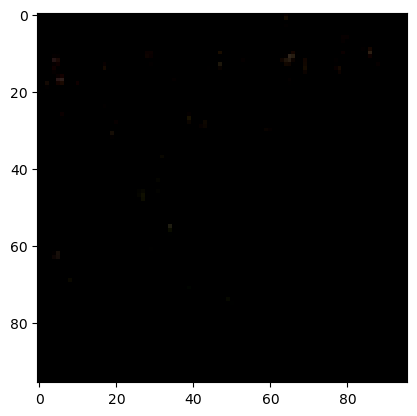

In [57]:
plt.imshow(im_np)

In [58]:
""" 测试卷积函数 """
# input = torch.randint(2,[2,3,4])
# input = torch.randn(5)
# input
# input, torch.relu(input)

# input,torch.sigmoid( input )
# input,torch.tanh( input )
# input,nn.LeakyReLU( input )

' 测试卷积函数 '

In [59]:
im_np.min(), im_np.max()

(-0.6156863, 0.18431377)

In [60]:
im_np = (im+1)/2    # 从 -1 到 1 变为 0-1 之间

In [61]:
im_np.min(), im_np.max()

(tensor(0.1922), tensor(0.5922))

In [62]:
train_ds.class_to_idx

{'cloudy': 0, 'rain': 1, 'shine': 2, 'sunrise': 3}

In [63]:
id_to_class = dict(
    (v,k) for k, v in train_ds.class_to_idx.items()
)
id_to_class

{0: 'cloudy', 1: 'rain', 2: 'shine', 3: 'sunrise'}

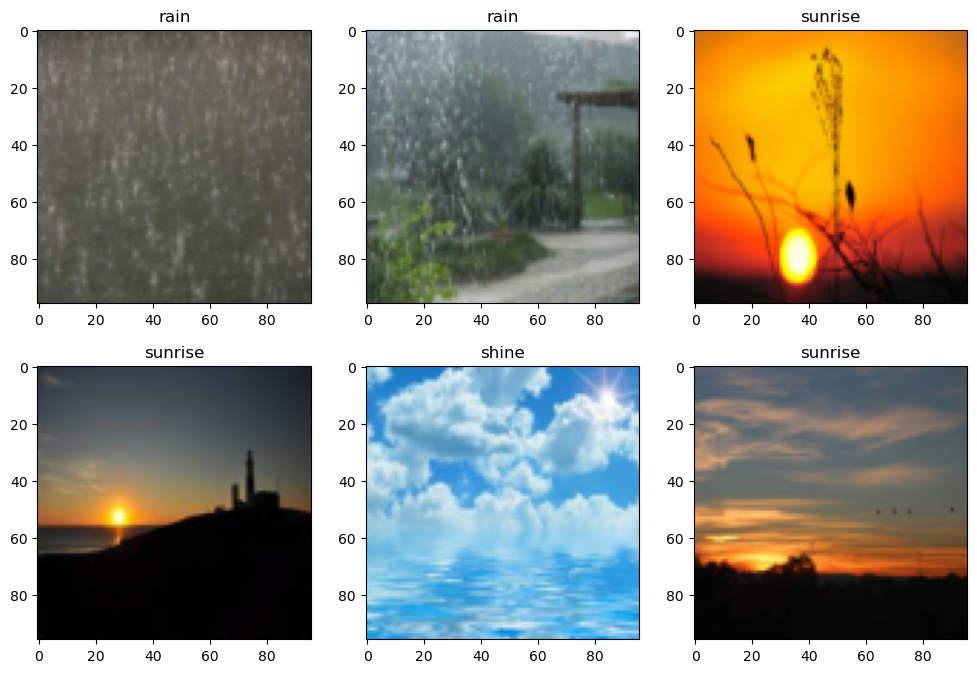

In [64]:
""" imgs, labels 显示 """
plt.figure(figsize=(12, 8))     # 设置画布
for i, (img, label) in enumerate( zip(imgs[:6], labels[:6]) ): #取前10张图片   
    img = img.permute(1,2,0) 
    img_np = (img.numpy() + 1)/2 
    plt.subplot(2, 3, i+1)
    plt.title( id_to_class.get( label.item() ))
    plt.imshow( img_np )


上面是数据准备和模式测试， 
以下正式开始设计：

In [65]:
class Net( nn.Module ):
    def __init__(self):
        super(Net, self).__init__()  # 父类的初始化
        self.conv1 = nn.Conv2d(3, 16, 3)        # 3:图片channel为3，作为输入； 16个卷积核，自定义； curnel size为3x3；
        self.pool = nn.MaxPool2d(2,2)           # 设计了MaxPool方法，2x2结构；
        self.conv2 = nn.Conv2d(16, 32, 3)       # 输入=conv1的输出16， 卷积核翻倍到32， 
        self.conv3 = nn.Conv2d(32, 64, 3)       # 输入=conv1的输出16， 卷积核翻倍到32， !#! 卷积核翻倍，模仿了vgg的著名卷积结构，比较有效。
        self.drop = nn.Dropout(0.5)             # 0.5, 丢掉50% 神经单元
        self.drop2d = nn.Dropout2d(0.5)             # 0.5, 丢掉50% 神经单元
        self.fc1 = nn.Linear(64*10*10, 1024)    # fc1: 全连接1层; 64*12*12为预估 (通过print输出调整)； 1024为自定义；
        self.fc2 = nn.Linear(1024, 256)           # fc2: 全连接2层; 1024为1层输出；4为4分类输出，配合label
        self.fc3 = nn.Linear(256, 4)           # fc2: 全连接2层; 1024为1层输出；4为4分类输出，配合label
    def forward(self, x):
        x = F.relu(self.conv1(x) )
        x = self.pool(x)
        x = F.relu(self.conv2(x) )
        x = self.pool(x)
        x = F.relu(self.conv3(x) )
        x = self.pool(x)
        x = self.drop2d(x)
        # print(x.size())             # torch.Size([16, 64, 10, 10])
        x = x.view(-1, 64*10*10)    # 通过view进行展平，其中64源于conv3的输出厚度64， 12x12为预估; Pytorch每次都需要我们去计划12x12，是有些问题的，不够成熟
        # x = x.view(-1, x.size(1) * x.size(2) * x.size(3))    # 通过view进行展平，其中64源于conv3的输出厚度64， 12x12为预估
        x = F.relu( self.fc1(x) )
        x = self.drop(x)
        x = F.relu( self.fc2(x) )
        x = self.drop(x)
        x = self.fc3(x)
        return x

model = Net()

In [66]:
preds = model( imgs )
imgs.shape, preds.shape

(torch.Size([256, 3, 96, 96]), torch.Size([256, 4]))

In [67]:
# 计算出preds的分类结果
preds_out = torch.argmax( preds, 1)     # 对preds的1维进行找最大数， 0维为个数


In [68]:
# model刚init，成功率并不高，所以需要后续训练
labels, preds_out, labels - preds_out

(tensor([1, 1, 3, 3, 2, 3, 1, 2, 0, 2, 0, 3, 2, 1, 2, 1, 3, 1, 2, 0, 1, 0, 1, 3,
         3, 0, 1, 3, 3, 0, 2, 0, 3, 3, 2, 0, 1, 0, 2, 2, 2, 1, 1, 3, 2, 2, 3, 3,
         3, 3, 0, 0, 1, 2, 1, 2, 2, 0, 1, 0, 2, 2, 0, 3, 2, 3, 0, 3, 3, 1, 3, 3,
         3, 0, 1, 0, 0, 2, 0, 3, 3, 3, 3, 1, 3, 3, 0, 1, 0, 3, 2, 1, 1, 1, 2, 2,
         2, 3, 3, 3, 0, 3, 3, 0, 3, 0, 3, 3, 1, 0, 3, 3, 1, 3, 3, 3, 1, 0, 0, 1,
         2, 3, 3, 2, 1, 0, 3, 1, 3, 0, 3, 2, 2, 1, 0, 1, 2, 1, 3, 2, 2, 3, 2, 3,
         1, 0, 3, 1, 3, 3, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 3, 0, 1, 1, 0, 1, 3, 0,
         1, 0, 0, 3, 3, 3, 1, 2, 3, 0, 2, 3, 0, 3, 2, 3, 0, 1, 3, 3, 2, 0, 3, 1,
         0, 3, 1, 2, 2, 1, 1, 0, 1, 2, 3, 3, 3, 2, 0, 3, 3, 3, 2, 1, 2, 2, 3, 2,
         3, 0, 3, 0, 2, 1, 2, 3, 3, 3, 2, 2, 0, 3, 1, 0, 2, 3, 3, 0, 2, 3, 3, 1,
         0, 2, 2, 3, 3, 2, 0, 0, 3, 1, 3, 0, 0, 0, 3, 0]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [69]:
model = model.to(device)

In [70]:
loss_fn = nn.CrossEntropyLoss()

In [71]:
"""
优化： 根据计算得到的损失，调整模型参数， 降低损失的过程；
- Adam 优化器
- SGD：优化model的参数、以及lr
"""
# opt = torch.optim.SGD(model.parameters(), lr=0.001)
optim = torch.optim.Adam(model.parameters(), lr=0.001)

In [72]:
"""
训练循环：计算准确率correect， 以及每个批次的平均loss
"""
# def train(dl, model, loss_fn, optimizer):
#     size = len( dl.dataset )    # 数据多少？
#     num_batches = len(dl)       # 返回训练批次
#     train_loss, correct = 0, 0 # 每个批次累计的loss之和， 正确的样本数累计
#     for x, y in dl:
#         x, y = x.to(device), y.to(device)
#         pred = model(x)
#         loss = loss_fn(pred, y)     # 按照损失函数，计算损失
#         optimizer.zero_grad()       # 清零后计算新的loop的梯度；
#         loss.backward()             # 按照loss，反向计算梯度；
#         optimizer.step()
#         with torch.no_grad():
#             # pred是2维，0维是batch数，1维才是0-9的logits输出；boll转换为float32，累计;item转换到python
#             correct += (pred.argmax(1)==y).type(torch.float).sum().item()  
#             train_loss += loss.item()
#     correct /= size
#     train_loss /= num_batches      # losss是以每个批次计算，correct是以个数计算；所以分母不同；
#     return correct, train_loss

'\n训练循环：计算准确率correect， 以及每个批次的平均loss\n'

In [73]:
# 测试函数: 计算准确率correect， 以及每个批次的平均loss
# def test(test_dl, model, loss_fn):
#     size = len( test_dl.dataset )    # 数据多少？
#     num_batches = len(test_dl)       # 返回训练批次
#     test_loss, correct = 0, 0 # 每个批次累计的loss之和， 正确的样本数累计
#     with torch.no_grad():
#         for x, y in test_dl:
#             x, y = x.to(device), y.to(device)
#             pred = model(x)
#             loss = loss_fn(pred, y)     # 按照损失函数，计算损失
#             test_loss += loss.item()
#             # pred是2维，0维是batch数，1维才是0-9的logits输出；boll转换为float32，累计;item转换到python
#             correct += (pred.argmax(1)==y).type(torch.float).sum().item()  
#         correct /= size
#         test_loss /= num_batches      # losss是以每个批次计算，correct是以个数计算；所以分母不同；
#         return correct, test_loss

In [74]:
""" 
    训练 N 个 epoch， 记录每个epoch的train和test的损失、准确率。 
"""
# batch_size 非常关键：4096不准确； 64很准确。16也比较差。 ！！！
def fit(epoch, model, train_dl, test_dl ):
    correct, total, running_loss = 0, 0, 0
    model.train()
    for x, y in train_dl:
        x, y = x.to(device), y.to(device)
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        optim.zero_grad()
        loss.backward()
        optim.step()
        with torch.no_grad():
            y_pred = torch.argmax(y_pred, dim=1)
            correct += (y_pred==y).sum().item()
            total += y.size(0)
            running_loss += loss.item()
    epoch_loss = running_loss / len(train_dl.dataset) 
    epoch_acc = correct / total
                           
    test_correct, test_total, test_running_loss = 0, 0, 0
    model.eval()
    with torch.no_grad():
        for x, y in test_dl:
            x, y = x.to(device), y.to(device)
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            # optim.zero_grad()
            # loss.backward()
            # optim.step()
            y_pred = torch.argmax(y_pred, dim=1)
            test_correct += (y_pred==y).sum().item()
            test_total += y.size(0)
            test_running_loss += loss.item()
    
    test_epoch_loss = test_running_loss / len(test_dl.dataset) 
    test_epoch_acc = test_correct / test_total
                           
    print('epoch: ', epoch,
        'loss: ', round(epoch_loss,3),
        'acc:', round(epoch_acc,3),
        'test_loss: ', round(test_epoch_loss,3),
        'test_acc:', round(test_epoch_acc,3)
        )         
    return epoch_acc, epoch_loss, test_epoch_acc,test_epoch_loss
    


In [75]:
epochs = 100
train_loss, train_acc = [], []
test_loss,  test_acc  = [], []
for epoch in range( epochs ):
    epoch_acc, epoch_loss, epoch_test_acc, epoch_test_loss = fit( epoch, model, train_dl, test_dl)
    train_acc.append(epoch_acc)
    train_loss.append(epoch_loss)
    test_acc.append(epoch_test_acc)
    test_loss.append(epoch_test_loss)  # 记录、图表化后，观察是否会过拟合等问题
    
# template = ("epoch:{:2d}, train_Loss:{:.5f}, train_acc:{:.2f}, test_Loss:{:.5f}, test_acc:{:.2f}, ")
# print(template.format( epoch, epoch_loss, epoch_acc*100, epoch_test_loss, epoch_test_acc*100))
# print('Done')
# return train_loss, train_acc, test_loss, test_acc


epoch:  0 loss:  0.006 acc: 0.393 test_loss:  0.004 test_acc: 0.516
epoch:  1 loss:  0.004 acc: 0.56 test_loss:  0.004 test_acc: 0.698
epoch:  2 loss:  0.004 acc: 0.659 test_loss:  0.003 test_acc: 0.769
epoch:  3 loss:  0.003 acc: 0.694 test_loss:  0.003 test_acc: 0.787
epoch:  4 loss:  0.003 acc: 0.759 test_loss:  0.003 test_acc: 0.809
epoch:  5 loss:  0.002 acc: 0.781 test_loss:  0.003 test_acc: 0.822
epoch:  6 loss:  0.002 acc: 0.789 test_loss:  0.003 test_acc: 0.84
epoch:  7 loss:  0.002 acc: 0.822 test_loss:  0.003 test_acc: 0.818
epoch:  8 loss:  0.002 acc: 0.821 test_loss:  0.003 test_acc: 0.844
epoch:  9 loss:  0.002 acc: 0.836 test_loss:  0.003 test_acc: 0.827
epoch:  10 loss:  0.002 acc: 0.834 test_loss:  0.003 test_acc: 0.849
epoch:  11 loss:  0.002 acc: 0.862 test_loss:  0.003 test_acc: 0.827
epoch:  12 loss:  0.002 acc: 0.849 test_loss:  0.003 test_acc: 0.876
epoch:  13 loss:  0.002 acc: 0.856 test_loss:  0.003 test_acc: 0.836
epoch:  14 loss:  0.002 acc: 0.856 test_loss: 

In [76]:
# epochs = 30
# batch_size = 16
# # batch_size = 64   
# # batch_size = 128
# # batch_size = 256
# # batch_size = 1024

# train_dl = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True)  # batch_size开始为64
# test_dl = torch.utils.data.DataLoader(test_ds, batch_size=batch_size, shuffle=False)
# train_loss, train_acc, test_loss, test_acc = fit(epochs,train_dl, test_dl, model, loss_fn, opt)


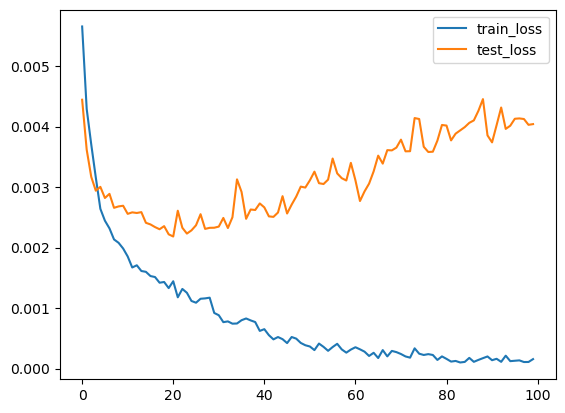

In [77]:
plt.plot( range(epochs), train_loss, label='train_loss')
plt.plot( range(epochs), test_loss, label='test_loss')
plt.legend()
# train_acc

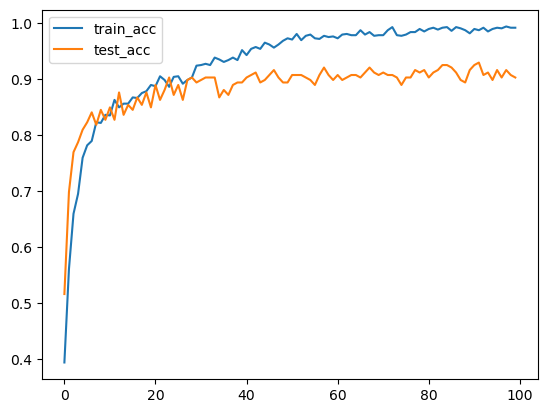

In [78]:
plt.plot( range(epochs), train_acc, label='train_acc')
plt.plot( range(epochs), test_acc, label='test_acc')
plt.legend()